### Compare if author's comfort talking to current supervisor about mental health issues or concerns and how easy it is to take medical leave.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import scipy.stats as st

---

In [2]:
# Read saved data
squeaky_2016 = Path("Resources/2016-cleaned.csv")
leave_work_df = pd.read_csv(squeaky_2016)

# Display sample data
leave_work_df.head()

,Unnamed: 0,age,original_gender,gender,country,remote,num_employees,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,obs_exper_bad_resp_cur_prev,obs_of_other_inhibit_discuss_curr,comf_discuss_mh_disorder_cur_superv,willing_discuss_mh_issue_prev_superv,request_med_leave,age groups
0,0,39,Male,male,United Kingdom,Sometimes,26-100,Yes,No,Maybe,Maybe,No,No Response,Yes,Some of my previous employers,Very easy,35-44
1,1,29,male,male,United States of America,Never,6-25,Yes,Yes,Maybe,No,No,No Response,Yes,Some of my previous employers,Somewhat easy,25-34
2,2,38,Male,male,United Kingdom,Always,6-25,Maybe,No,Yes,Yes,Maybe/Not sure,Yes,Maybe,I don't know,Neither easy nor difficult,35-44
3,3,43,male,male,United Kingdom,Sometimes,No Response,Yes,Yes,Yes,Maybe,No,No Response,No Response,Some of my previous employers,No Response,35-44
4,4,43,Female,female,United States of America,Sometimes,6-25,Yes,Yes,Maybe,No,"Yes, I experienced",Yes,No,Some of my previous employers,Neither easy nor difficult,35-44


#### ease of taking medical leave and comfort talking to supervisor - very easy

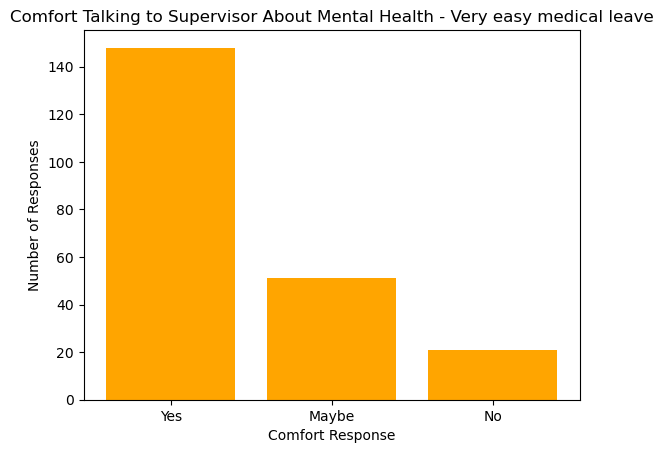

In [3]:
# Ease of taking medical leave and comfort level talking to current supervisor?
very_easy_answer = leave_work_df.loc[leave_work_df["request_med_leave"] == "Very easy", :]
very_easy_answer = very_easy_answer[["comf_discuss_mh_disorder_cur_superv", "request_med_leave"]]

very_easy_answer = pd.DataFrame(very_easy_answer["comf_discuss_mh_disorder_cur_superv"].value_counts())
very_easy_answer.index.names = ["Very easy"]
plt.bar(very_easy_answer.index, very_easy_answer["count"], color = "orange")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.legend(title="Comfort Talking to Supervisor About Mental Health - Very easy medical leave", title_fontsize="medium", bbox_to_anchor=(0.06, 1.02))
plt.title("Comfort Talking to Supervisor About Mental Health - Very easy medical leave")
plt.xlabel("Comfort Response")
plt.ylabel("Number of Responses")

# Save the figure
plt.savefig("Figures/very_easy_medical_leave.png")

# Show plot
plt.show()

In [4]:
very_easy_answer

,count
Very easy,
Yes,148
Maybe,51
No,21


#### ease of taking medical leave and comfort talking to supervisor - somewhat easy

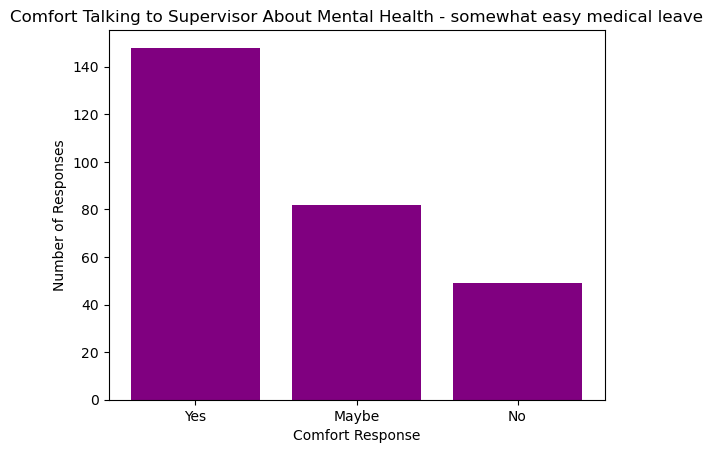

In [5]:
somewhat_easy_answer = leave_work_df.loc[leave_work_df["request_med_leave"] == "Somewhat easy", :]
somewhat_easy_answer = somewhat_easy_answer[["comf_discuss_mh_disorder_cur_superv", "request_med_leave"]]

somewhat_easy_answer = pd.DataFrame(somewhat_easy_answer["comf_discuss_mh_disorder_cur_superv"].value_counts())
somewhat_easy_answer.index.names = ["Somewhat easy"]
plt.bar(somewhat_easy_answer.index, somewhat_easy_answer["count"], color = "purple")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Comfort Talking to Supervisor About Mental Health - somewhat easy medical leave")
plt.xlabel("Comfort Response")
plt.ylabel("Number of Responses")

# Save the figure
plt.savefig("Figures/somewhat_easy_medical_leave.png")

# Show plot
plt.show()

In [6]:
somewhat_easy_answer

,count
Somewhat easy,
Yes,148
Maybe,82
No,49




#### ease of taking medical leave and comfort talking to supervisor - neither easy nor difficult


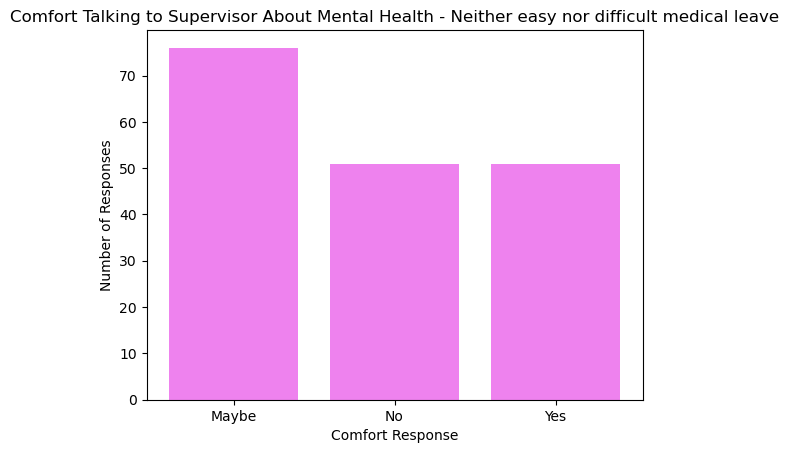

In [7]:
neither_answer = leave_work_df.loc[leave_work_df["request_med_leave"] == "Neither easy nor difficult", :]
neither_answer = neither_answer[["comf_discuss_mh_disorder_cur_superv", "request_med_leave"]]

neither_answer = pd.DataFrame(neither_answer["comf_discuss_mh_disorder_cur_superv"].value_counts())
neither_answer.index.names = ["Neither easy nor difficult"]
plt.bar(neither_answer.index, neither_answer["count"], color = "violet")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Comfort Talking to Supervisor About Mental Health - Neither easy nor difficult medical leave")
plt.xlabel("Comfort Response")
plt.ylabel("Number of Responses")

# Save the figure
plt.savefig("Figures/neither_medical_leave.png")

# Show plot
plt.show()

In [8]:
neither_answer

,count
Neither easy nor difficult,
Maybe,76
No,51
Yes,51


#### ease of taking medical leave and comfort talking to supervisor - somewhat difficult

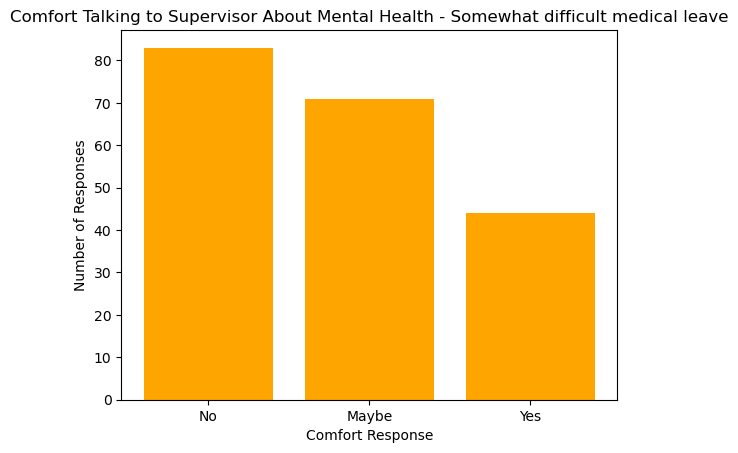

In [9]:
some_diff_answer = leave_work_df.loc[leave_work_df["request_med_leave"] == "Somewhat difficult", :]
some_diff_answer = some_diff_answer[["comf_discuss_mh_disorder_cur_superv", "request_med_leave"]]

some_diff_answer = pd.DataFrame(some_diff_answer["comf_discuss_mh_disorder_cur_superv"].value_counts())
some_diff_answer.index.names = ["Somewhat difficult"]
plt.bar(some_diff_answer.index, some_diff_answer["count"], color = "orange")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Comfort Talking to Supervisor About Mental Health - Somewhat difficult medical leave")
plt.xlabel("Comfort Response")
plt.ylabel("Number of Responses")

# Save the figure
plt.savefig("Figures/some_diff_medical_leave.png")

# Show plot
plt.show()

In [10]:
some_diff_answer

,count
Somewhat difficult,
No,83
Maybe,71
Yes,44


#### ease of taking medical leave and comfort talking to supervisor - very difficult

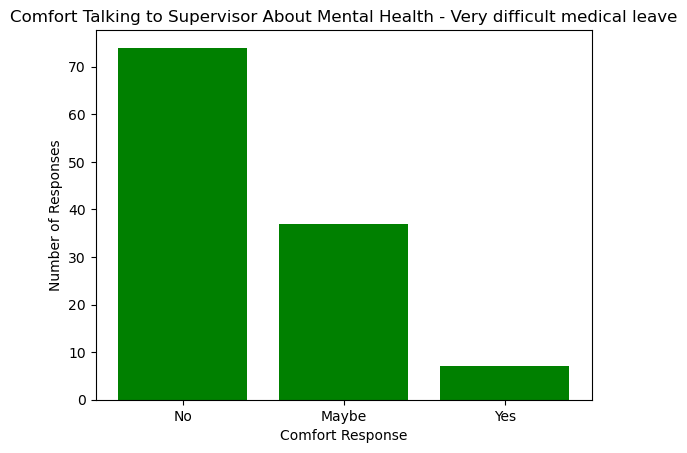

In [11]:
very_diff_answer = leave_work_df.loc[leave_work_df["request_med_leave"] == "Very difficult", :]
very_diff_answer[["comf_discuss_mh_disorder_cur_superv", "request_med_leave"]]

very_diff_answers = pd.DataFrame(very_diff_answer["comf_discuss_mh_disorder_cur_superv"].value_counts())
very_diff_answers.index.names = ["Very difficult"]
plt.bar(very_diff_answers.index, very_diff_answers["count"], color = "green")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Comfort Talking to Supervisor About Mental Health - Very difficult medical leave")
plt.xlabel("Comfort Response")
plt.ylabel("Number of Responses")

# Save the figure
plt.savefig("Figures/very_diff_medical_leave.png")

# Show plot
plt.show()

In [12]:
very_diff_answer

,Unnamed: 0,age,original_gender,gender,country,remote,num_employees,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,obs_exper_bad_resp_cur_prev,obs_of_other_inhibit_discuss_curr,comf_discuss_mh_disorder_cur_superv,willing_discuss_mh_issue_prev_superv,request_med_leave,age groups
8,8,44,Female,female,United States of America,Sometimes,26-100,Yes,Yes,Maybe,Maybe,"Yes, I observed",No,Maybe,"No, at none of my previous employers",Very difficult,35-44
16,16,32,I identify as female.,female,Canada,Always,26-100,Yes,Yes,Yes,No,"Yes, I experienced",Yes,Maybe,"No, at none of my previous employers",Very difficult,25-34
26,26,27,Male,male,Netherlands,Sometimes,26-100,Yes,Yes,No,Maybe,Maybe/Not sure,Yes,No,I don't know,Very difficult,25-34
61,61,27,Male,male,United Kingdom,Never,26-100,Yes,Maybe,Yes,Maybe,Maybe/Not sure,Yes,Maybe,Some of my previous employers,Very difficult,25-34
72,72,46,Male,male,United States of America,Sometimes,6-25,No,No,No,No,No,No Response,No,"No, at none of my previous employers",Very difficult,45-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,1410,38,Male,male,Belgium,Never,26-100,Maybe,Yes,No,No,"Yes, I observed",Yes,No,"No, at none of my previous employers",Very difficult,35-44
1409,1414,36,female,female,United States of America,Never,500-1000,Yes,Yes,Maybe,No,Maybe/Not sure,No,Maybe,Some of my previous employers,Very difficult,35-44
1410,1415,24,Female,female,United States of America,Never,More than 1000,Yes,Yes,Maybe,No,Maybe/Not sure,Maybe,No,No Response,Very difficult,18-24
1412,1417,31,Male,male,Netherlands,Never,26-100,Yes,Yes,Maybe,No,"Yes, I experienced",No Response,No,No Response,Very difficult,25-34


#### ease of taking medical leave and comfort talking to supervisor - no or I don't know responses

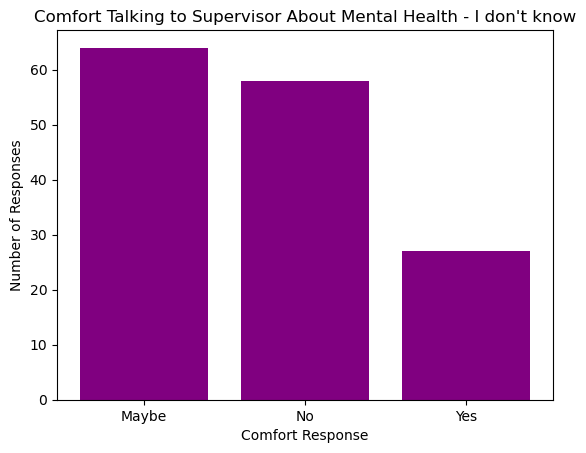

In [13]:
idk_answer = leave_work_df.loc[leave_work_df["request_med_leave"] == "I don't know", :]
idk_answer_mh = idk_answer[["comf_discuss_mh_disorder_cur_superv", "request_med_leave"]]

idk_answers = pd.DataFrame(idk_answer_mh["comf_discuss_mh_disorder_cur_superv"].value_counts())
idk_answers.index.names = ["I don't know"]
plt.bar(idk_answers.index, idk_answers["count"], color = "purple")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Comfort Talking to Supervisor About Mental Health - I don't know")
plt.xlabel("Comfort Response")
plt.ylabel("Number of Responses")

# Save the figure
plt.savefig("Figures/idk_medical_leave.png")

# Show plot
plt.show()

In [14]:
idk_answers

,count
I don't know,
Maybe,64
No,58
Yes,27


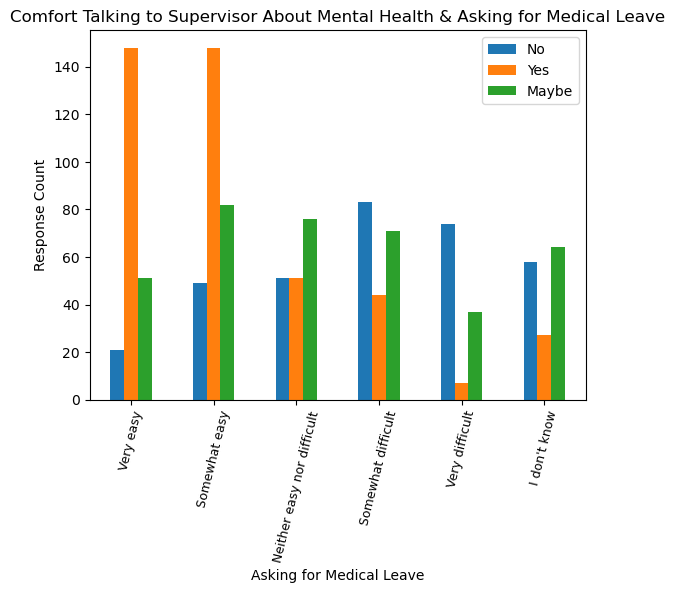

In [19]:
leave = ["Very easy", "Somewhat easy", "Neither easy nor difficult", "Somewhat difficult", "Very difficult", "I don't know"]
no = [21, 49, 51, 83, 74, 58]
yes = [148, 148, 51, 44, 7, 27]
maybe = [51, 82, 76, 71, 37, 64]

MH_leave_df = pd.DataFrame({"No": no, "Yes": yes, "Maybe": maybe}, index=leave)
MH_leave_df.plot.bar(rot=76, align="center")
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
#plt.legend(title="Comfort Talking to Supervisor About Mental Health & Reqesting Medical Leave", title_fontsize="medium", bbox_to_anchor=(1.0, 1.3))
plt.title("Comfort Talking to Supervisor About Mental Health & Asking for Medical Leave")
plt.xlabel("Asking for Medical Leave")
plt.ylabel("Response Count")

plt.savefig("Figures/diagnosis_fullmedicalleave.png")
plt.show()